# RUN WITH PYTHON 3 and LATEST TENSORFLOW

In [107]:
# for google cloud gpu only
!pip install keras

In [0]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

In [0]:
np.random.seed(1671)  # for reproducibility

In [0]:
#define the convnet 
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        # CONV (20 filters, kernel size 5, padding = same) => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # CONV (50 filters, kernel size 5, padding = same) => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [0]:
# network and training
NB_EPOCH = 25  # 1 for CPU 25 for GPU
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

In [0]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [0]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering("th")

In [0]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255

In [115]:
X_train.shape

(60000, 28, 28)

In [116]:
y_train.shape

(60000,)

In [0]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

In [118]:
X_train.shape

(60000, 1, 28, 28)

In [119]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices - create one-hot vectors
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])

In [122]:
history = model.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 6s 128us/step - loss: 0.1841 - acc: 0.9438 - val_loss: 0.0616 - val_acc: 0.9810
Epoch 2/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0514 - acc: 0.9838 - val_loss: 0.0458 - val_acc: 0.9858
Epoch 3/25
48000/48000 [==============================] - 6s 119us/step - loss: 0.0343 - acc: 0.9895 - val_loss: 0.0406 - val_acc: 0.9875
Epoch 4/25
16896/48000 [=========>....................] - ETA: 3s - loss: 0.0182 - acc: 0.9941

48000/48000 [==============================] - 6s 119us/step - loss: 0.0232 - acc: 0.9924 - val_loss: 0.0448 - val_acc: 0.9858
Epoch 5/25
48000/48000 [==============================] - 6s 119us/step - loss: 0.0176 - acc: 0.9944 - val_loss: 0.0365 - val_acc: 0.9897
Epoch 6/25
48000/48000 [==============================] - 6s 119us/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0350 - val_acc: 0.9899
Epoch 7/25
40064/48000 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.9968

48000/48000 [==============================] - 6s 118us/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0387 - val_acc: 0.9880
Epoch 8/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0105 - acc: 0.9965 - val_loss: 0.0565 - val_acc: 0.9847
Epoch 9/25
48000/48000 [==============================] - 6s 119us/step - loss: 0.0086 - acc: 0.9970 - val_loss: 0.0403 - val_acc: 0.9883
Epoch 10/25
44160/48000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9981

48000/48000 [==============================] - 6s 118us/step - loss: 0.0064 - acc: 0.9980 - val_loss: 0.0452 - val_acc: 0.9883
Epoch 11/25
48000/48000 [==============================] - 6s 119us/step - loss: 0.0059 - acc: 0.9980 - val_loss: 0.0400 - val_acc: 0.9918
Epoch 12/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0068 - acc: 0.9979 - val_loss: 0.0522 - val_acc: 0.9879
Epoch 13/25
43904/48000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9979

48000/48000 [==============================] - 6s 119us/step - loss: 0.0059 - acc: 0.9979 - val_loss: 0.0432 - val_acc: 0.9911
Epoch 14/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0459 - val_acc: 0.9901
Epoch 15/25
48000/48000 [==============================] - 6s 117us/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0379 - val_acc: 0.9921
Epoch 16/25
44032/48000 [==========================>...] - ETA: 0s - loss: 0.0041 - acc: 0.9986

48000/48000 [==============================] - 6s 117us/step - loss: 0.0045 - acc: 0.9986 - val_loss: 0.0420 - val_acc: 0.9896
Epoch 17/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0461 - val_acc: 0.9894
Epoch 18/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0342 - val_acc: 0.9922
Epoch 19/25
44032/48000 [==========================>...] - ETA: 0s - loss: 0.0034 - acc: 0.9989

48000/48000 [==============================] - 6s 118us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0393 - val_acc: 0.9912
Epoch 20/25
48000/48000 [==============================] - 6s 118us/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0386 - val_acc: 0.9910
Epoch 21/25
48000/48000 [==============================] - 6s 117us/step - loss: 0.0049 - acc: 0.9983 - val_loss: 0.0461 - val_acc: 0.9908
Epoch 22/25
44032/48000 [==========================>...] - ETA: 0s - loss: 0.0021 - acc: 0.9995

48000/48000 [==============================] - 6s 118us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0339 - val_acc: 0.9929
Epoch 23/25
48000/48000 [==============================] - 6s 118us/step - loss: 8.2957e-05 - acc: 1.0000 - val_loss: 0.0366 - val_acc: 0.9927
Epoch 24/25
48000/48000 [==============================] - 6s 117us/step - loss: 2.3058e-05 - acc: 1.0000 - val_loss: 0.0364 - val_acc: 0.9933
Epoch 25/25
42112/48000 [=========================>....] - ETA: 0s - loss: 1.0047e-05 - acc: 1.0000

48000/48000 [==============================] - 6s 118us/step - loss: 1.0338e-05 - acc: 1.0000 - val_loss: 0.0368 - val_acc: 0.9933


In [123]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 88us/step

Test score: 0.033932007025618875
Test accuracy: 0.9934


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


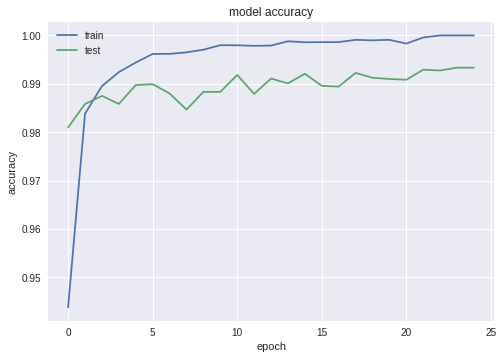

In [124]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

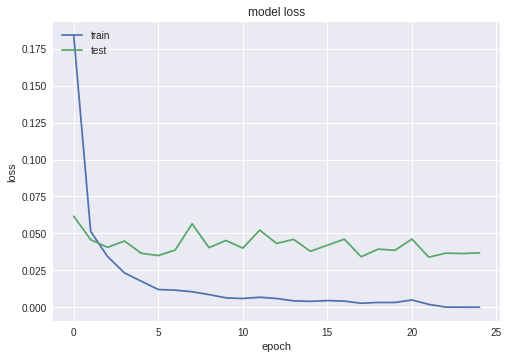

In [125]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# save model on disk
model.save('keras_LeNet.h5')

In [0]:
from keras.models import load_model
ld_model = load_model('keras_LeNet.h5')

In [128]:
ld_score = ld_model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", ld_score[0])
print('Test accuracy:', ld_score[1])

10000/10000 [==============================] - 1s 110us/step

Test score: 0.033932007025618875
Test accuracy: 0.9934


In [0]:
test_img =  X_test[44][0][:]

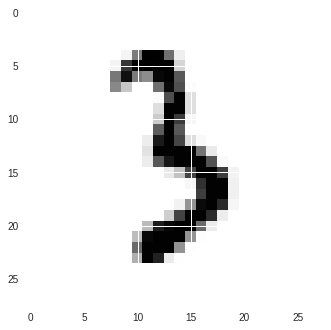

In [159]:
plt.imshow(test_img)

In [0]:
test_image = test_img[np.newaxis, np.newaxis, :, :]
pred = ld_model.predict(test_image)

In [0]:
prediction = pred.argmax(axis=1)

In [163]:
prediction[0]

3